In [1]:
import numpy as np
from statsmodels.tsa.stattools import ccovf
from statsmodels.tsa.stattools import acovf
from statsmodels.tsa.stattools import ccf
from scipy.linalg import solve_continuous_lyapunov
from scipy import signal
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib import colors
from ipywidgets import interactive 
from ipywidgets import fixed
from mpl_toolkits.axes_grid1 import make_axes_locatable

from helper_functions.helpers import *
from simulation.simulation_functions import *

# Figure 1

## Panel b: deterministic rates, stable

In [3]:
r_ss, r_n, r_p, R_ss, R_n, R_p, W, mu, ts, sigE, sigI = global_inh_model(t0=0, 
                                                     r0 = np.array([[30], [30], [35]]),
                                                     r_bar = np.array([[30],[30],[35]]),
                                                     T=1500, 
                                                     dt=.01,
                                                     t_kick=80_000,
                                                     kick_bool=True,
                                                     kick=.5,
                                                     tau_E=15, 
                                                     tau_I=15, 
                                                     sigE=1, 
                                                     sigI=1,
                                                     c=0,
                                                     shared_structure=np.array([[1],[1],[0]]),
                                                     Wee=1.15,
                                                     Wii=0.5,
                                                     Wei=1,
                                                     Wie=1,
                                                     alpha = 0.15)

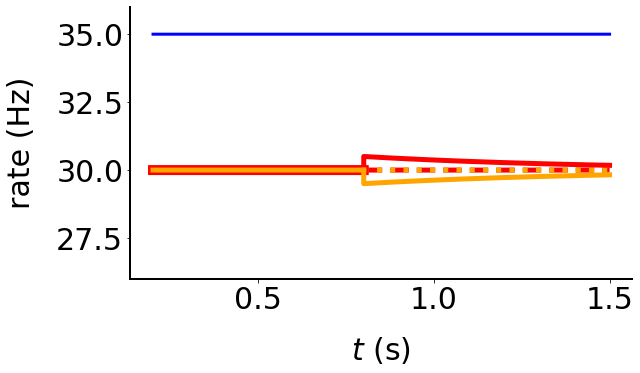

In [4]:
fig, ax = plt.subplots(figsize=(9,5))
start = 20000
#start = 0
times=.01*ts[start:]/1000

ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$t$ (s)', fontsize=30, labelpad=20)
ax.set_ylabel(r'rate (Hz)', fontsize=30, labelpad=20)
ax.set_ylim(26,36)

ax.plot(.01*ts[80_000:]/1000, R_ss[0,80_000:], linewidth=5, linestyle='dashed', color='red', label=r'$\bar{r}_{E_1}$')
ax.plot(.01*ts[80_000:]/1000, R_ss[1,80_000:], linewidth=5, linestyle='dotted', color='orange', label=r'$\bar{r}_{E_2}$')

ax.plot(.01*ts[start:80_000]/1000, R_p[0,start:80_000], linewidth=10, linestyle='-', color='red')
ax.plot(.01*ts[80_000:]/1000, R_p[0,80_000:], linewidth=5, linestyle='-', color='red')

ax.plot(.01*ts[start:80_000]/1000, R_p[1,start:80_000], linewidth=5, linestyle='-', color='orange')
ax.plot(.01*ts[80_000:]/1000, R_p[1,80_000:], linewidth=5, linestyle='-', color='orange')

ax.plot(times, R_ss[2,start:], linewidth=3, linestyle='-', color='blue', alpha=1)

plt.savefig('figs/Fig1_Panel_b.pdf', bbox_inches='tight')
plt.show()

## Panel c: deterministic rates, winner-take-all dynamics

Consider $\alpha = 0.10$. In this case, the global inhibition network is unstable, and exhibits winner-take-all dynamics:

In [5]:
r_ss, r_n, r_p, R_ss, R_n, R_p, W, mu, ts, sigE, sigI = global_inh_model(t0=0, 
                                                     r0 = np.array([[30],[30],[35]]),
                                                     r_bar = np.array([[30],[30],[35]]),
                                                     T=1500, 
                                                     dt=.01,
                                                     t_kick=80_000,
                                                     kick_bool=True,
                                                     kick=.5,
                                                     tau_E=15, 
                                                     tau_I=15, 
                                                     sigE=1, 
                                                     sigI=1,
                                                     c=0,
                                                     shared_structure=np.array([[1],[1],[0]]),
                                                     Wee=1.15,
                                                     Wii=0.5,
                                                     Wei=1,
                                                     Wie=1,
                                                     alpha = 0.10)

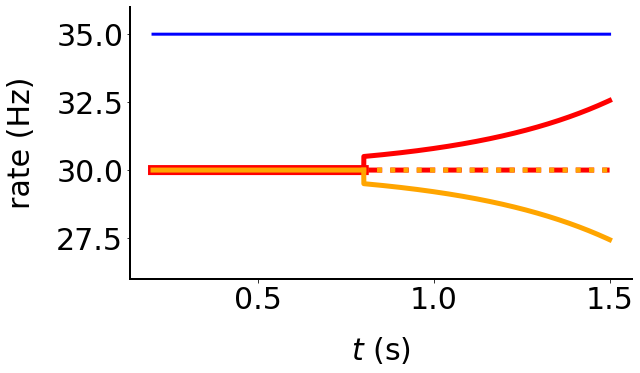

In [6]:
fig, ax = plt.subplots(figsize=(9,5))
start = 20000
#start = 0
times=.01*ts[start:]/1000

ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$t$ (s)', fontsize=30, labelpad=20)
ax.set_ylabel(r'rate (Hz)', fontsize=30, labelpad=20)
ax.set_ylim(26,36)

ax.plot(.01*ts[80_000:]/1000, R_ss[0,80_000:], linewidth=5, linestyle='dashed', color='red', label=r'$\bar{r}_{E_1}$')
ax.plot(.01*ts[80_000:]/1000, R_ss[1,80_000:], linewidth=5, linestyle='dotted', color='orange', label=r'$\bar{r}_{E_2}$')

ax.plot(.01*ts[start:80_000]/1000, R_p[0,start:80_000], linewidth=10, linestyle='-', color='red')
ax.plot(.01*ts[80_000:]/1000, R_p[0,80_000:], linewidth=5, linestyle='-', color='red')

ax.plot(.01*ts[start:80_000]/1000, R_p[1,start:80_000], linewidth=5, linestyle='-', color='orange')
ax.plot(.01*ts[80_000:]/1000, R_p[1,80_000:], linewidth=5, linestyle='-', color='orange')

ax.plot(times, R_ss[2,start:], linewidth=3, linestyle='-', color='blue', alpha=1)

plt.savefig('figs/Fig1_Panel_c.pdf', bbox_inches='tight')
plt.show()

## Supplemental 

/var/folders/3l/tv69nng54nsdx0t5kvn28ksh0000gn/T/ipykernel_11423/3079442220.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  if alpha < 1 - (1/Wee): # WTA dynamics condition


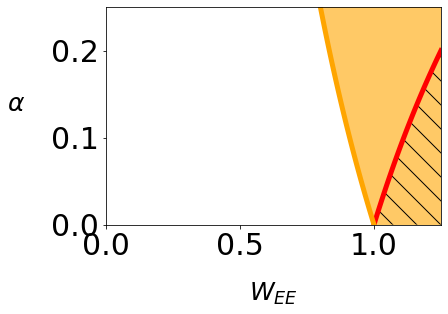

In [10]:
num = 1000
mat1 = np.zeros((num,num))
mat2 = np.zeros((num,num))

alphas = np.linspace(0, .25, num)
Wees = np.linspace(0, 1.25, num)

for i in range(num):
    alpha = alphas[i]
    for j in range(num):
        Wee = Wees[j]
        if Wee > 1/(1+alpha): # ISN condition
            mat1[i,j] = 1
        if alpha < 1 - (1/Wee): # WTA dynamics condition
            mat2[i,j] = 1
            
WTA_mask = np.ma.masked_less(mat2, 1)


fig,ax = plt.subplots()
cmap = colors.ListedColormap(['white', 'orange'])
bounds=[0,.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

im1 = ax.imshow(np.flip(mat1, axis=0), extent=[Wees[0],Wees[-1], alphas[0],alphas[-1]], aspect='auto', cmap=cmap, norm=norm, alpha=0.6)
ax.contourf(WTA_mask, extent=[Wees[0],Wees[-1], alphas[0],alphas[-1]], hatches='\\', alpha=0)

xs1 = np.linspace(1, Wees[-1])
ax.plot(xs1, 1-(1/xs1), linewidth=5, color='red')

xs2 = np.linspace(1/(1+alphas[-1]), 1)
ax.plot(xs2, 1/xs2 -1, linewidth=5, color='orange')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$W_{EE}$', fontsize=25, labelpad=20)
ax.set_ylabel(r'$\alpha$', rotation=0, fontsize=25, labelpad=35)

plt.savefig('figs/Fig1_Supplement.pdf', bbox_inches='tight')
plt.show()

# Figure 2

## Panel b: correlated rate traces

In [7]:
r_ss, r_n, r_p, R_ss, R_n, R_p, W, mu, ts, sigE, sigI = global_inh_model(t0=0, 
                                                     T=2500, 
                                                     r0=np.array([[30],[30],[35]]),
                                                     r_bar=np.array([[30],[30],[35]]),
                                                     dt=.01,
                                                     t_kick=80_000,
                                                     kick_bool=False,
                                                     kick=.5,
                                                     tau_E=15, 
                                                     tau_I=15, 
                                                     sigE=1, 
                                                     sigI=1,
                                                     c=0.5,
                                                     shared_structure=np.array([[1],[1],[0]]),
                                                     Wee=0.5,
                                                     Wii=0.5,
                                                     Wei=0.5,
                                                     Wie=0.5,
                                                     alpha = 0.15)

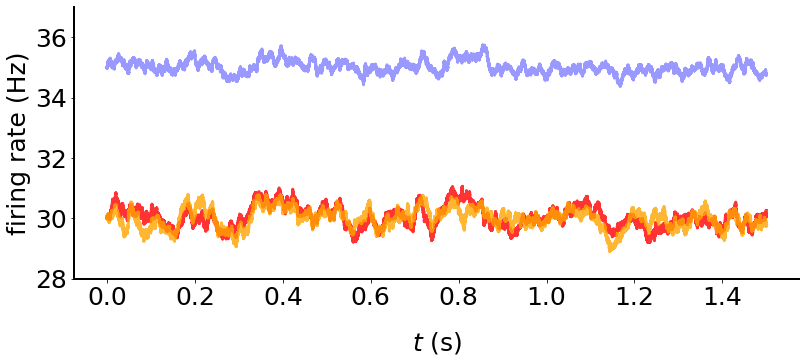

In [8]:
start = 1 
end = 150_000
times = .01*ts[start:end]/1000

fig, ax = plt.subplots(figsize=(13,5))
ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.plot(times, R_n[0,start:end], color='red', linestyle='-', linewidth=3, alpha=.8, label=r'$r_{E_1}(t)$')
#plt.plot(times, R_ss[0,start:end], color='red')

ax.plot(times, R_n[1,start:end], color='orange', linestyle='-', linewidth=3, alpha=.8, label=r'$r_{E_2}(t)$')
#plt.plot(times, R_ss[1,start:end], color='orange')

ax.plot(times, R_n[2,start:end], color='blue', linestyle='-', linewidth=3, alpha=.4, label=r'$r_{I}$')
#plt.plot(times, R_ss[2,start:end], color='blue')

ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.set_xlabel(r'$t$ (s)', fontsize=25, labelpad=20)
ax.set_ylabel('firing rate (Hz)', fontsize=25)
ax.set_ylim(28,37)

#plt.legend(bbox_to_anchor=(.8,.6), loc="upper left", fontsize=25, frameon=False)

#plt.axis('off')
plt.savefig('figs/Fig2_Panel_b.pdf', bbox_inches='tight')
plt.show()

## Panels c and d: matching simulation and theory

`autocov_sim` computes the simulated autocovariance function of $\mathbf{r}$. To explain notation: 

- `corrmat11` refers to the simulation data for the autocovariance function $\langle{r_{E_1}(t), r_{E_1}(t+h)\rangle}$ for lags $h \in \mathbb{Z}$. Columns of this array represent the simulated values of the autocovariance function, so that each column corresponds to a distinct realization. 
- Similarly, `corrmat12` refers to the simulation data for the cross-covariance function $\langle r_{E_1}(t), r_{E_2}(t+h) \rangle$, and likewise for the other `corrmat` arrays.
- Averaging over the columns of these `corrmat` arrays gives the theoretical auto/cross-covariance functions.

To perform the simulation, assign arrays to the output of `autocov_sim`. One can save these arrays using `np.save`, like in the following commented cell cell: 

In [2]:
# np.save('autocov_E1-E1', corrmat11)

Simulation data are provided as .npy files, which are loaded into arrays:

In [2]:
corrmat11_stored = np.load('simulation/sim data/autocov_E1-E1.npy')
corrmat12_stored = np.load('simulation/sim data/autocov_E1-E2.npy')
corrmat13_stored = np.load('simulation/sim data/autocov_E1-I.npy')

Additional simulations can be run:

In [4]:
corrmat11_new, corrmat22_new, corrmat23_new, corrmat12_new, corrmat13_new, corrmat33_new = autocov_sim(T=2500, tau_E=15, tau_I=15, sigE=1, sigI=1, c=0.5, shared_structure=np.array([[1],[1],[0]]), Wee=0.5, Wii=0.5, Wei=0.5, Wie=0.5, r_bar=np.array([[30], [30], [35]]), alpha=0.15, num_of_sims=1)



0 of 0


Concatenate the stored arrays with the new simulated data:

In [3]:
corrmat11 = corrmat11_stored
corrmat12 = corrmat12_stored
corrmat13 = corrmat13_stored

In [5]:
corrmat11 = np.c_[corrmat11_stored, corrmat11_new]
corrmat12 = np.c_[corrmat12_stored, corrmat12_new]
corrmat13 = np.c_[corrmat13_stored, corrmat13_new]

Then average the arrays over columns to obtain the desired auto/cross-covariance functions:

In [ ]:
auto_corr(
                   Wei=w_ei,
                   Wie=w_ei,
                   Wee=1.15,
                   Wii=0.5,
                   alpha=0.15,
                   sigE1=1,
                   sigE2=1,
                   sigI=1,
                   C=0,
                   tau=15,
                   shared_structure=np.array([[1],[1],[0]]),
                   r_bar=np.array([[30],[30],[35]]),
                   dt=0.01,
                   lags=np.arange(-5000,5000))

In [10]:
lags1 = np.arange(-200,200) # lags for theory 
lags2 = np.linspace(-200,200,40_000) # lags for sims 

avg11 = np.mean(corrmat11, axis=1)
avg12 = np.mean(corrmat12, axis=1)
avg13 = np.mean(corrmat13, axis=1)

In [11]:
lags, y1,y2,y3, Wei = auto_corr(
                   Wei=0.50,
                   Wie=0.50,
                   Wee=0.50,
                   Wii=0.50,
                   alpha=0.15,
                   sigE1=1,
                   sigE2=1,
                   sigI=1,
                   C=0.5,
                   tau=15,
                   shared_structure=np.array([[1],[1],[0]]),
                   r_bar=np.array([[30],[30],[35]]),
                   dt=0.01,
                   lags=lags1)

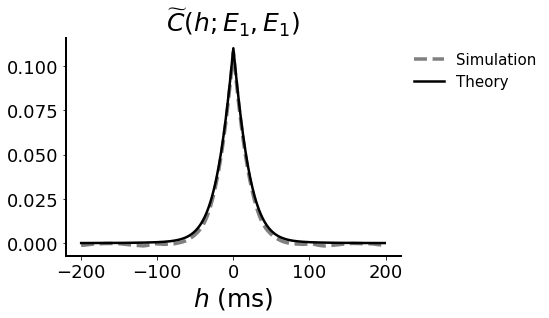

In [12]:
fig, ax = plt. subplots()
ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.plot(lags2, avg11[210_000:250_000], color='grey', linestyle='--', linewidth=3.5, label='Simulation')
ax.plot(lags1, y1, color='black', linestyle='-', linewidth=2.5, label='Theory')
plt.title(r'$\widetilde{C}(h; E_1,E_1)$',  fontsize=25)
plt.xlabel(r'$h$ (ms)', fontsize=25)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

ax.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=15, frameon=False)
plt.savefig('figs/Fig2_Panel_c.pdf', bbox_inches='tight')
plt.show()

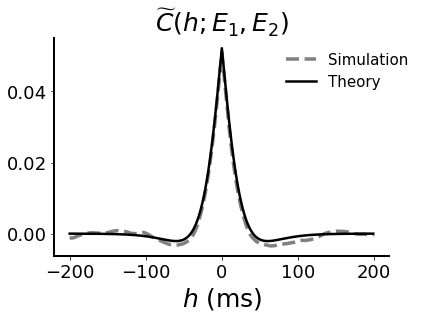

In [13]:
fig, ax = plt. subplots()
ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.plot(lags2, avg12[210_000:250_000],  color='grey', linestyle='--', linewidth=3.5, label='Simulation')
ax.plot(lags1, y2, color='black', linestyle='-', linewidth=2.5, label='Theory')
plt.title(r'$\widetilde{C}(h; E_1,E_2)$', fontsize=25)
plt.xlabel(r'$h$ (ms)', fontsize=25)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.legend(bbox_to_anchor=(.65,1), loc="upper left", fontsize=15, frameon=False)
plt.savefig('figs/Fig2_Panel_d.pdf', bbox_inches='tight')
plt.show()

# Figure 3

## Panel a: non-ISN correlation plot

In [5]:
interactive_plot = interactive(corr_plot,
                               lowerW_EI=fixed(0),
                               upperW_EI=fixed(2),
                               lowerW_IE=fixed(0),
                               upperW_IE=fixed(2),
                               W_EE=fixed(0.5),
                               W_II=fixed(0.5),
                               sigE1=fixed(1),
                               sigE2=fixed(1),
                               sigI=fixed(1),
                               alpha=fixed(0.15),
                               C=fixed(0),
                               b=fixed(0),
                              filename='figs/Fig3_Panel_a.pdf')
interactive_plot

interactive(children=(Text(value='figs/Fig3_Panel_a.pdf', description='filename'), Output()), _dom_classes=('w…

## Panels c1, d1: path expansion

### Panel c1

In [6]:
interactive_plot = interactive(path_contributions, 
                               Wee=fixed(0.5),
                               Wii=fixed(0.5),
                               Wie=fixed(0.07),
                               Wei=fixed(2),
                               sigE1=fixed(1),
                               sigE2=fixed(1),
                               sigI=fixed(1),
                               alpha=fixed(0.15),
                               nn=fixed(2),
                               ylim_lower=fixed(0),
                               ylim_upper=(.4,.90, .01),
                               filename='figs/Fig3_Panel_c1.pdf'
                              )
interactive_plot

interactive(children=(FloatSlider(value=0.65, description='ylim_upper', max=0.9, min=0.4, step=0.01), Text(val…

### Panel d1

In [7]:
interactive_plot = interactive(path_contributions, 
                               Wee=fixed(0.5),
                               Wii=fixed(0.5),
                               Wie=fixed(2),
                               Wei=fixed(.05),
                               sigE1=fixed(1),
                               sigE2=fixed(1),
                               sigI=fixed(1),
                               alpha=fixed(0.15),
                               nn=fixed(2),
                               ylim_lower=(-.15, -.05,.01), # controls vertical width of plot
                               ylim_upper=(.05,.15,.01), 
                               filename='figs/Fig3_Panel_d1.pdf'
                              )
interactive_plot

interactive(children=(FloatSlider(value=-0.10999999999999999, description='ylim_lower', max=-0.05, min=-0.15, …

# Figure 4

## Panel b: ISN correlation plot, independent input

In [8]:
interactive_plot = interactive(corr_plot,
                               lowerW_EI=fixed(0),
                               upperW_EI=fixed(2),
                               lowerW_IE=fixed(0),
                               upperW_IE=fixed(2),
                               W_EE=fixed(1.15),
                               W_II=fixed(0.5),
                               sigE1=fixed(1),
                               sigE2=fixed(1),
                               sigI=fixed(1),
                               alpha=fixed(0.15),
                               C=fixed(0),
                               b=fixed(0),
                              filename='figs/Fig4_Panel_b.pdf')
interactive_plot

interactive(children=(Text(value='figs/Fig4_Panel_b.pdf', description='filename'), Output()), _dom_classes=('w…

## Panel c: zoom of panel b plot, eigenvalues

In [6]:
interactive_plot = interactive(eos_diagslice,
                                alpha=fixed(0.15),
                                sigE1=fixed(1),
                                sigE2=fixed(1),
                                sigI=fixed(1),
                                Wii=fixed(0.5),
                                Wee=fixed(1.15),
                                Wei_min=fixed(0.4),
                                Wei_max=fixed(0.8),
                                filename='figs/Fig4_Panel_c.pdf')
interactive_plot

interactive(children=(Text(value='figs/Fig4_Panel_c.pdf', description='filename'), Output()), _dom_classes=('w…

## Panel d: auto-correlation functions near stability boundary

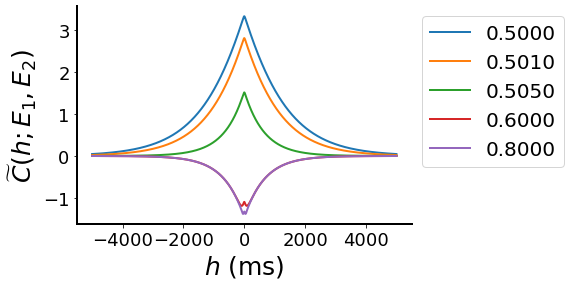

In [15]:
fig,ax = plt.subplots()
ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

Weis = np.array([.50, .501, .505, .6, .8]) # change these to control points along slice to evaluate auto-correlation function

for w_ei in Weis: 
    lags, y1,y2,y3, Wei = auto_corr(
                   Wei=w_ei,
                   Wie=w_ei,
                   Wee=1.15,
                   Wii=0.5,
                   alpha=0.15,
                   sigE1=1,
                   sigE2=1,
                   sigI=1,
                   C=0,
                   tau=15,
                   shared_structure=np.array([[1],[1],[0]]),
                   r_bar=np.array([[30],[30],[35]]),
                   dt=0.01,
                   lags=np.arange(-5000,5000))
    
    ax.plot(lags, y2, linestyle='-', linewidth=2, label=f'{Wei:.4f}') 

plt.xlabel(r'$h$ (ms)', fontsize=25)
plt.ylabel(r'$\widetilde{C}(h; E_1,E_2)$', fontsize=25)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=20)

plt.savefig('figs/Fig4_Panel_d.pdf', bbox_inches='tight', transparent=True)
plt.show()

## Panel f: ISN correlation plot, strongly correlated input

In [7]:
interactive_plot = interactive(corr_plot,
                               lowerW_EI=fixed(0),
                               upperW_EI=fixed(2),
                               lowerW_IE=fixed(0),
                               upperW_IE=fixed(2),
                               W_EE=fixed(1.15),
                               W_II=fixed(0.5),
                               sigE1=fixed(1),
                               sigE2=fixed(1),
                               sigI=fixed(1),
                               alpha=fixed(0.15),
                               C=fixed(0.95),
                               b=fixed(0),
                              filename='figs/Fig4_Panel_f.pdf')
interactive_plot

interactive(children=(Text(value='figs/Fig4_Panel_f.pdf', description='filename'), Output()), _dom_classes=('w…

## Supplemental: rate traces along stability boundary

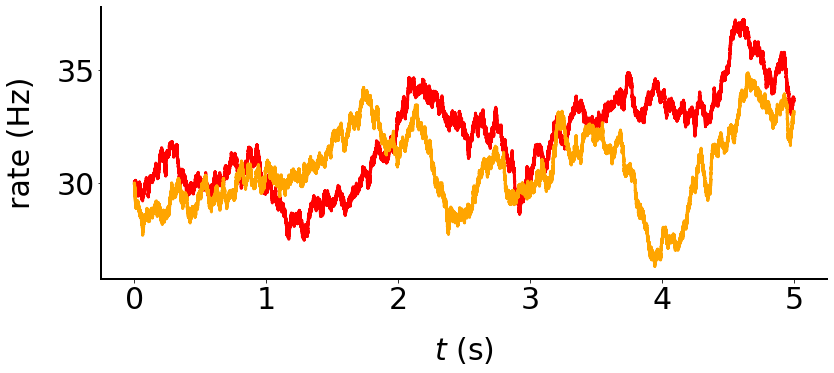

In [26]:
r_ss, r_n, r_p, R_ss, R_n, R_p, W, mu, ts, sigE, sigI = global_inh_model(t0=0, 
                                                     r0=np.array([[30], [30], [35]]),
                                                     r_bar=np.array([[30], [30], [35]]),
                                                     T=5000, 
                                                     dt=.01,
                                                     t_kick=80_000,
                                                     kick_bool=False,
                                                     kick=.5,
                                                     tau_E=15, 
                                                     tau_I=15, 
                                                     sigE=1, 
                                                     sigI=1,
                                                     c=0,
                                                     shared_structure=np.array([[1],[1],[0]]),
                                                     Wee=1.15,
                                                     Wii=0.5,
                                                     Wei=0.5,
                                                     Wie=0.5,
                                                     alpha = 0.15)

fig, ax = plt.subplots(figsize=(13,5))

start = 1
#start = 0
end = 500_000
times=.01*ts[start:end]/1000

ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$t$ (s)', fontsize=30, labelpad=20)
ax.set_ylabel(r'rate (Hz)', fontsize=30, labelpad=20)

ax.plot(times, R_n[0,start:end], linewidth=3, color='red', linestyle='-', label=r'$r_{E_1}(t)$')
ax.plot(times, R_n[1,start:end], linewidth=3, color='orange', linestyle='-', label=r'$r_{E_2}(t)$')

#plt.legend(bbox_to_anchor=(.5,1.3), loc="upper left", fontsize=18)
plt.savefig('figs/Fig4_Supplemental_1.pdf', bbox_inches='tight')
plt.show()

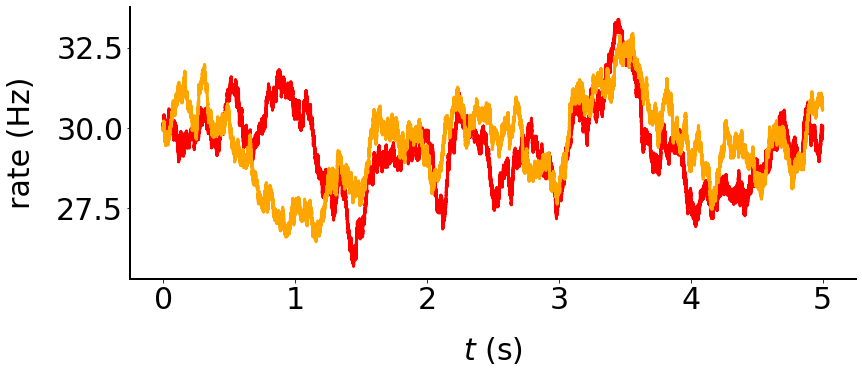

In [24]:
r_ss, r_n, r_p, R_ss, R_n, R_p, W, mu, ts, sigE, sigI = global_inh_model(t0=0, 
                                                     r0=np.array([[30], [30], [35]]),
                                                     r_bar=np.array([[30], [30], [35]]),
                                                     T=5000, 
                                                     dt=.01,
                                                     t_kick=80_000,
                                                     kick_bool=False,
                                                     kick=.5,
                                                     tau_E=15, 
                                                     tau_I=15, 
                                                     sigE=1, 
                                                     sigI=1,
                                                     c=0,
                                                     shared_structure=np.array([[1],[1],[0]]),
                                                     Wee=1.15,
                                                     Wii=0.5,
                                                     Wei=0.17,
                                                     Wie=1.50,
                                                     alpha = 0.15)

fig, ax = plt.subplots(figsize=(13,5))

start = 1
#start = 0
end = 500_000
times=.01*ts[start:end]/1000

ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$t$ (s)', fontsize=30, labelpad=20)
ax.set_ylabel(r'rate (Hz)', fontsize=30, labelpad=20)

ax.plot(times, R_n[0,start:end], linewidth=3, color='red', linestyle='-', label=r'$r_{E_1}(t)$')
ax.plot(times, R_n[1,start:end], linewidth=3, color='orange', linestyle='-', label=r'$r_{E_2}(t)$')

#plt.legend(bbox_to_anchor=(.5,1.3), loc="upper left", fontsize=18)
plt.savefig('figs/Fig4_Supplemental_2.pdf', bbox_inches='tight')
plt.show()

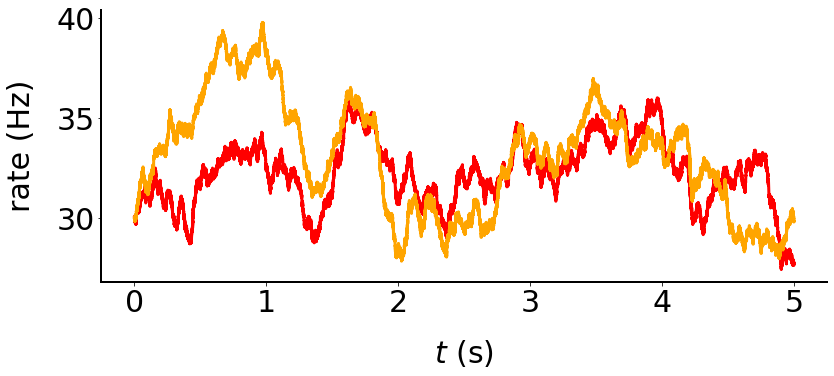

In [25]:
r_ss, r_n, r_p, R_ss, R_n, R_p, W, mu, ts, sigE, sigI = global_inh_model(t0=0, 
                                                     r0=np.array([[30], [30], [35]]),
                                                     r_bar=np.array([[30], [30], [35]]),
                                                     T=5000, 
                                                     dt=.01,
                                                     t_kick=80_000,
                                                     kick_bool=False,
                                                     kick=.5,
                                                     tau_E=15, 
                                                     tau_I=15, 
                                                     sigE=1, 
                                                     sigI=1,
                                                     c=0,
                                                     shared_structure=np.array([[1],[1],[0]]),
                                                     Wee=1.15,
                                                     Wii=0.5,
                                                     Wei=1.50,
                                                     Wie=0.17,
                                                     alpha = 0.15)

fig, ax = plt.subplots(figsize=(13,5))

start = 1
#start = 0
end = 500_000
times=.01*ts[start:end]/1000

ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$t$ (s)', fontsize=30, labelpad=20)
ax.set_ylabel(r'rate (Hz)', fontsize=30, labelpad=20)

ax.plot(times, R_n[0,start:end], linewidth=3, color='red', linestyle='-', label=r'$r_{E_1}(t)$')
ax.plot(times, R_n[1,start:end], linewidth=3, color='orange', linestyle='-', label=r'$r_{E_2}(t)$')

#plt.legend(bbox_to_anchor=(.5,1.3), loc="upper left", fontsize=18)
plt.savefig('figs/Fig4_Supplemental_3.pdf', bbox_inches='tight')
plt.show()